In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from scipy.optimize import curve_fit

from utils.model import hill_activation, hill_activation_single, hill_activation_and, random_search#, hill_activation_ymin_ymax
from utils.helper import generate_data_at_t, \
                       get_blank_corrected, get_neg_ctrl_corrected, get_pos_ctrl_corrected
from utils.plotter import plot_heatmap

In [2]:
folder = '100-promoters-characterization'

In [3]:
def plot_single_responses(data, promoters, inducers, row=3, col=3, xlabel='RPU', ylabel='RPU'):
    
    f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(promoters):
            y = data[filter(lambda x: x.startswith(promoters[i]), data.index)]
            ax.scatter(inducers[i], y)
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
            ax.loglog()
            ax.set_title(promoters[i])
        else:
            ax.set_visible(False)
    plt.tight_layout()
    sns.despine()
    
def plot_multiple_responses(data, promoters, inducers, row=3, col=3, xlabel='RPU', ylabel='RPU'):
    
    f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(promoters):
            y_avg = data.loc[filter(lambda x: x.startswith(promoters[i]), data.index)].mean(axis=1)
            y_std = data.loc[filter(lambda x: x.startswith(promoters[i]), data.index)].std(axis=1)
            ax.errorbar(inducers[i], y_avg, y_std, marker='o', linestyle='')
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
            ax.loglog()
            ax.set_title(promoters[i])
        else:
            ax.set_visible(False)
    plt.tight_layout()
    sns.despine()

In [4]:
filename = '006-promoters-characterization-01'
map_file = '006-plate_map'

promoters = ['PBAD-rJ', 'PCin-rJ', 'CymRC-PCymRC-rJ',
             'PLuxB-rJ', 'PPhlF-rJ', 'PSalTTC-rJ', 'RhaS-PRhaB-rJ']

induction_lvl = 11
max_inducers = [416, 160, 800, 20, 50, 1600, 15300] #ara, ohc14, cuma, ahl, dapg, sal, rha
inducers = []
dil = 2
for x, mi in enumerate(max_inducers):
    inducer = ([mi] + [mi/i for i in [dil**j for j in range(1, induction_lvl+1)]])
    inducer.reverse()
    inducers.append(inducer)

[('A', 'sample'), ('B', 'positive')]
[('A', 'sample'), ('B', 'positive')]


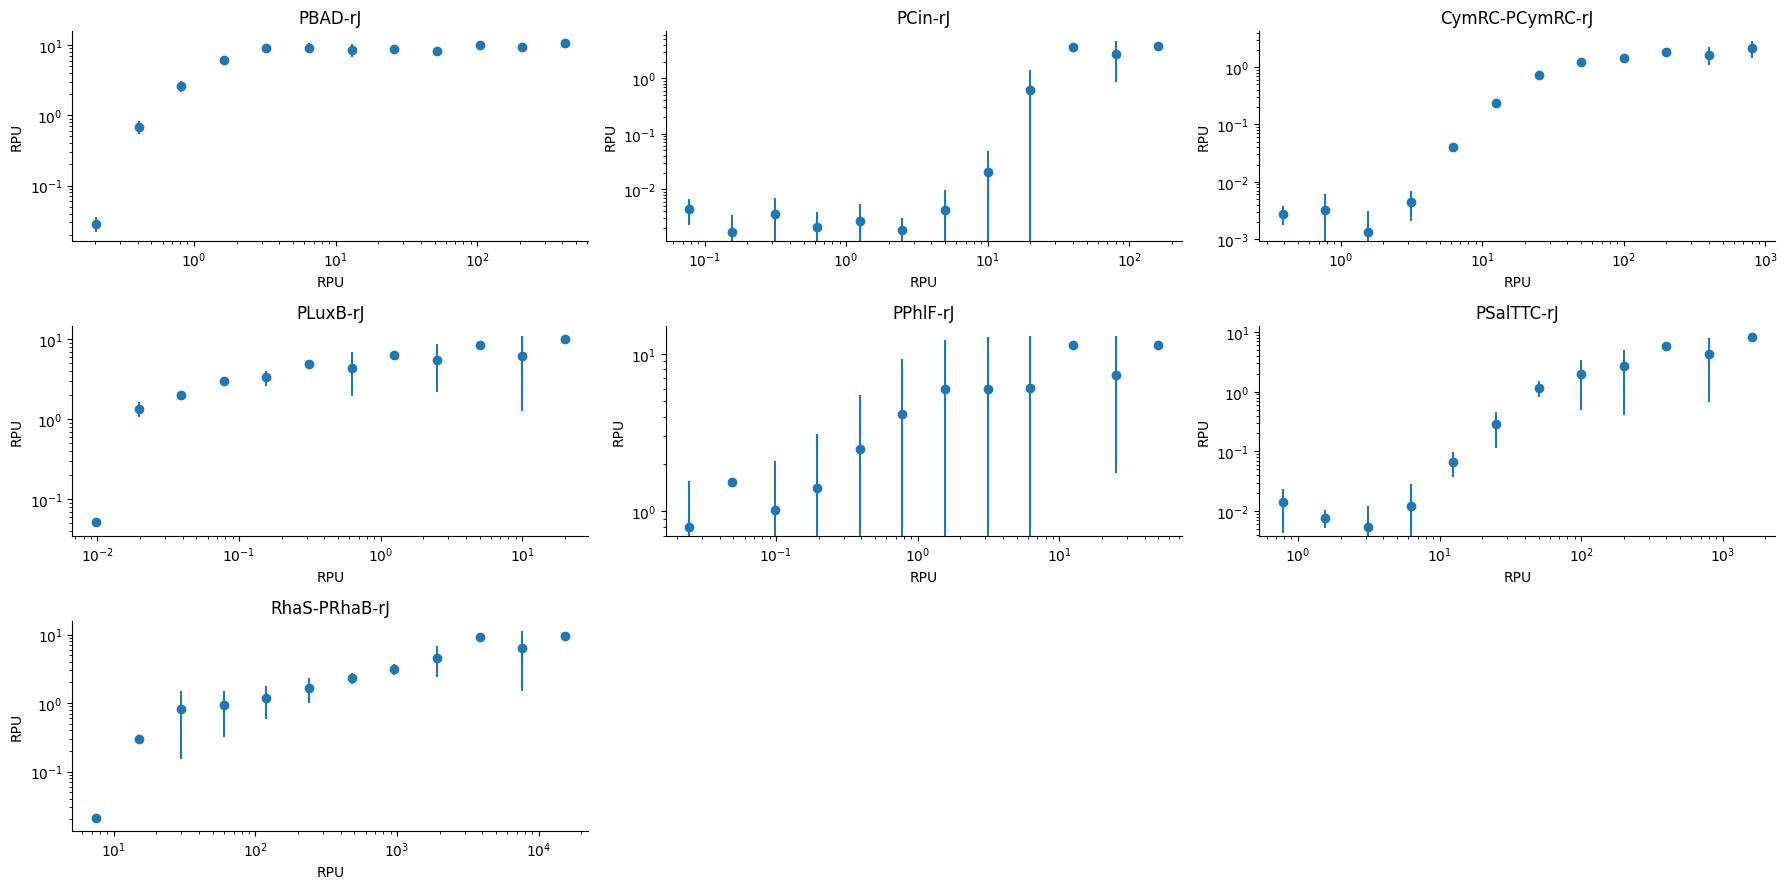

In [5]:
samples_t_6 = generate_data_at_t(folder, '006-promoters-characterization-01', map_file)[0]
samples_t_8 = generate_data_at_t(folder, '008-promoters-characterization-02', map_file)[0]
combined_samples = pd.concat([samples_t_6, samples_t_8], axis=1)
plot_multiple_responses(combined_samples, promoters, inducers)

[('A', 'sample'), ('B', 'positive')]


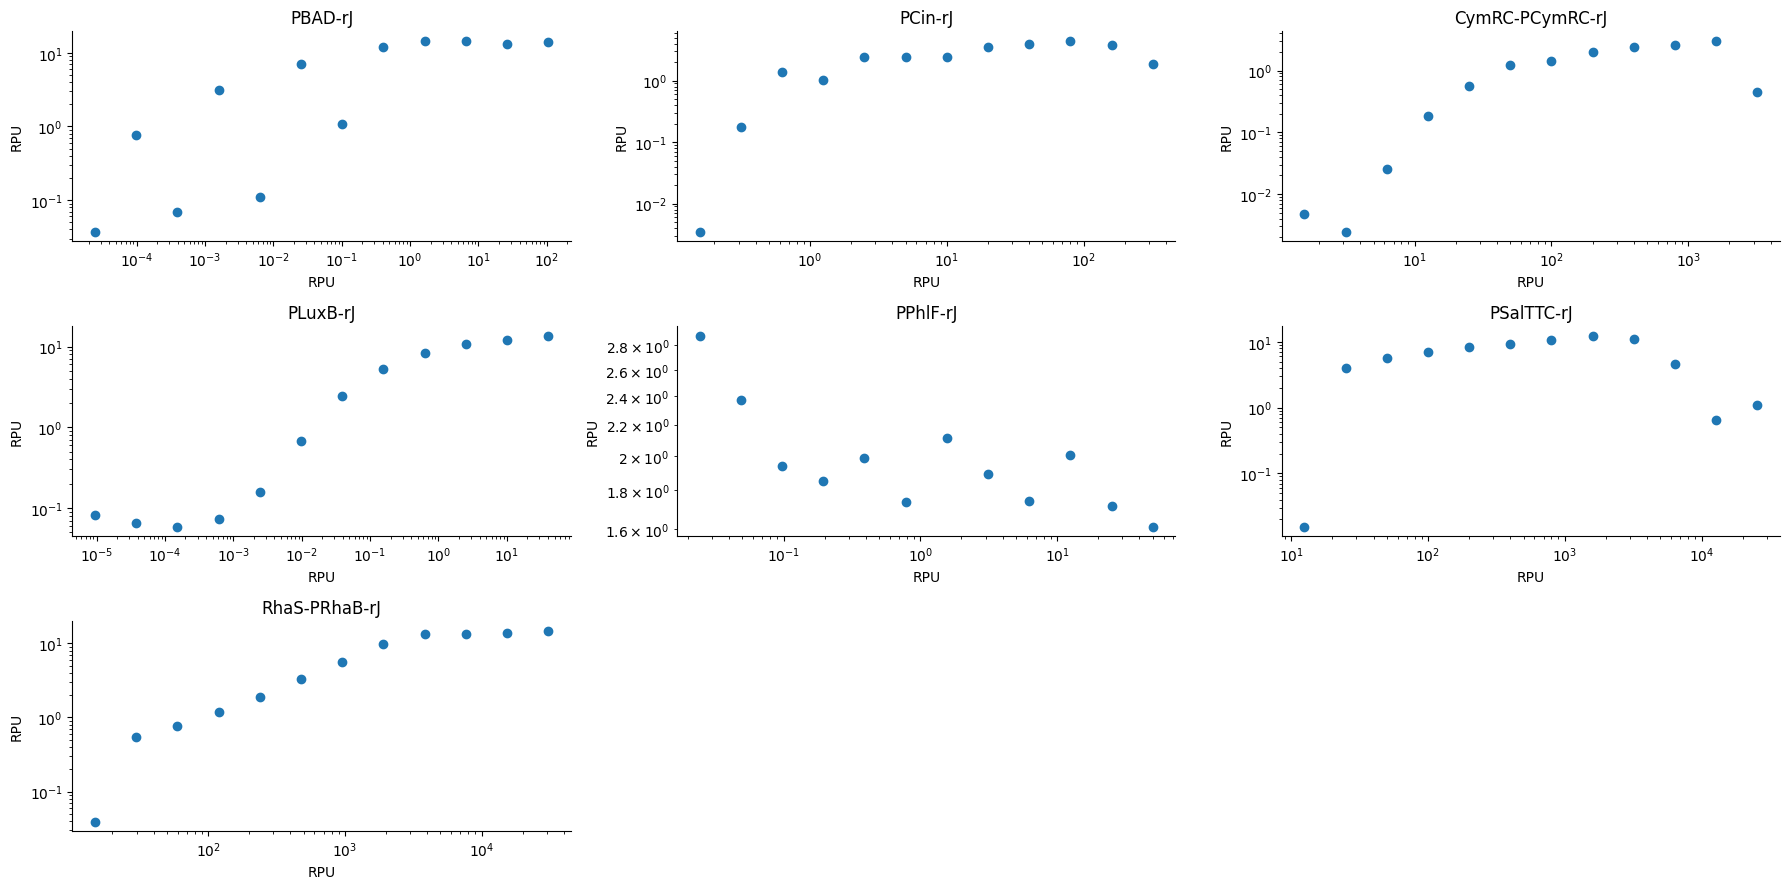

In [6]:
filename = '010-promoters-characterization-03'

promoters = ['PBAD-rJ', 'PCin-rJ', 'CymRC-PCymRC-rJ',
             'PLuxB-rJ', 'PPhlF-rJ', 'PSalTTC-rJ', 'RhaS-PRhaB-rJ']

induction_lvl = 11
max_inducers = [104, 320, 3200, 40, 50, 25600, 30600] #ara, ohc14, cuma, ahl, dapg, sal, rha
inducers = []
for x, mi in enumerate(max_inducers):
    dil = 4 if x in [0, 3] else 2
    inducer = ([mi] + [mi/i for i in [dil**j for j in range(1, induction_lvl+1)]])
    inducer.reverse()
    inducers.append(inducer)

samples_t_10 = generate_data_at_t(folder, filename, map_file)[0]
plot_single_responses(samples_t_10, promoters, inducers)

#### To add 011 -  012

In [7]:
filename = '029-promoters-characterization-06'
map_file = '029-plate_map'

promoters = ['PBAD-rJ', 'AraC-PBAD-rJ', 'CymRC-PCymRC-rJ',
             'PLux2-rJ', 'PPhlF-rJ', 'RhaS-PRhaB-rJ', 'AraC-PBAD.1']

induction_lvl = 11
max_inducers = [52, 52, 200, 40, 50, 15300, 52] #ara, ohc14, cuma, ahl, dapg, sal, rha
inducers = []
for x, mi in enumerate(max_inducers):
    dil = 4 if x in [0, 1, 3, 6] else 2
    inducer = ([mi] + [mi/i for i in [dil**j for j in range(1, induction_lvl+1)]])
    inducer.reverse()
    inducers.append(inducer)

[('A', 'sample'), ('B', 'positive')]


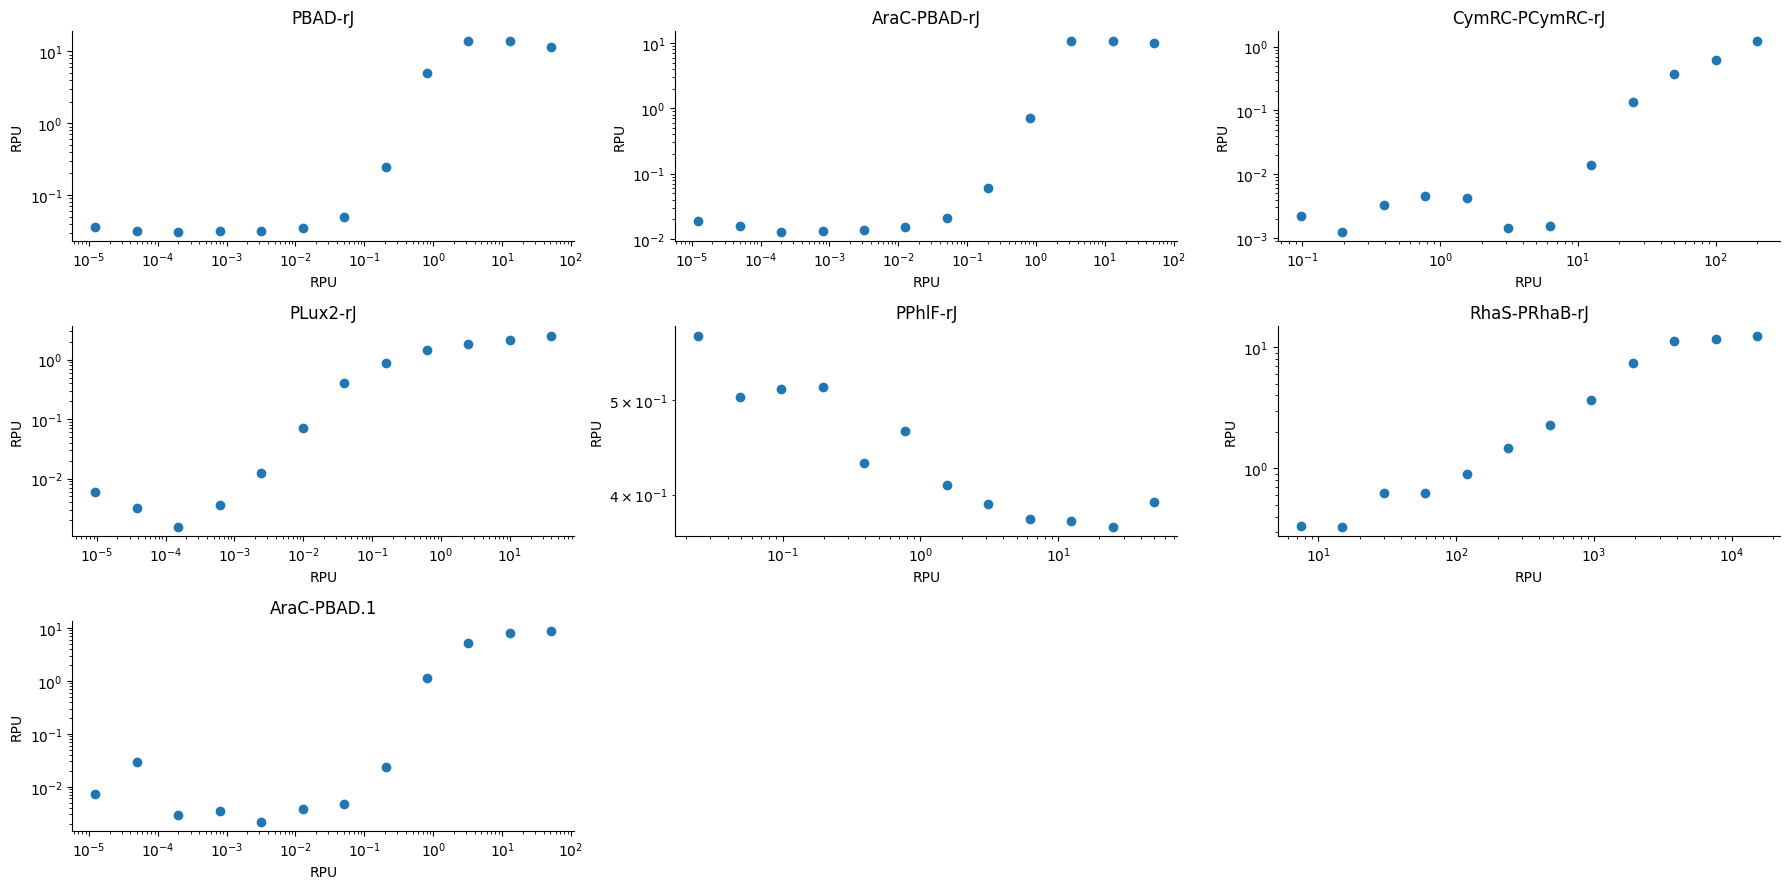

In [8]:
samples_t_29 = generate_data_at_t(folder, filename, map_file)[0]
plot_single_responses(samples_t_29, promoters, inducers)

In [9]:
map_file = '030-plate_map'

promoters = ['AraC-PBAD.1', 'PBAD-rJ', 'AraC-PBAD-rJ', 'CymRC-pCymRC-rJ.1',
             'PCymRC-rJ', 'PLux2-rJ', 'CymRC-PCymRC-rJ.2']

induction_lvl = 11
max_inducers = [52, 52, 52, 200, 200, 40, 200]
inducers = []
for x, mi in enumerate(max_inducers):
    dil = 2 if x in [3, 4, 6] else 4
    inducer = ([mi] + [mi/i for i in [dil**j for j in range(1, induction_lvl+1)]])
    inducer.reverse()
    inducers.append(inducer)

[('A', 'sample'), ('B', 'positive')]
[('A', 'sample'), ('B', 'positive')]


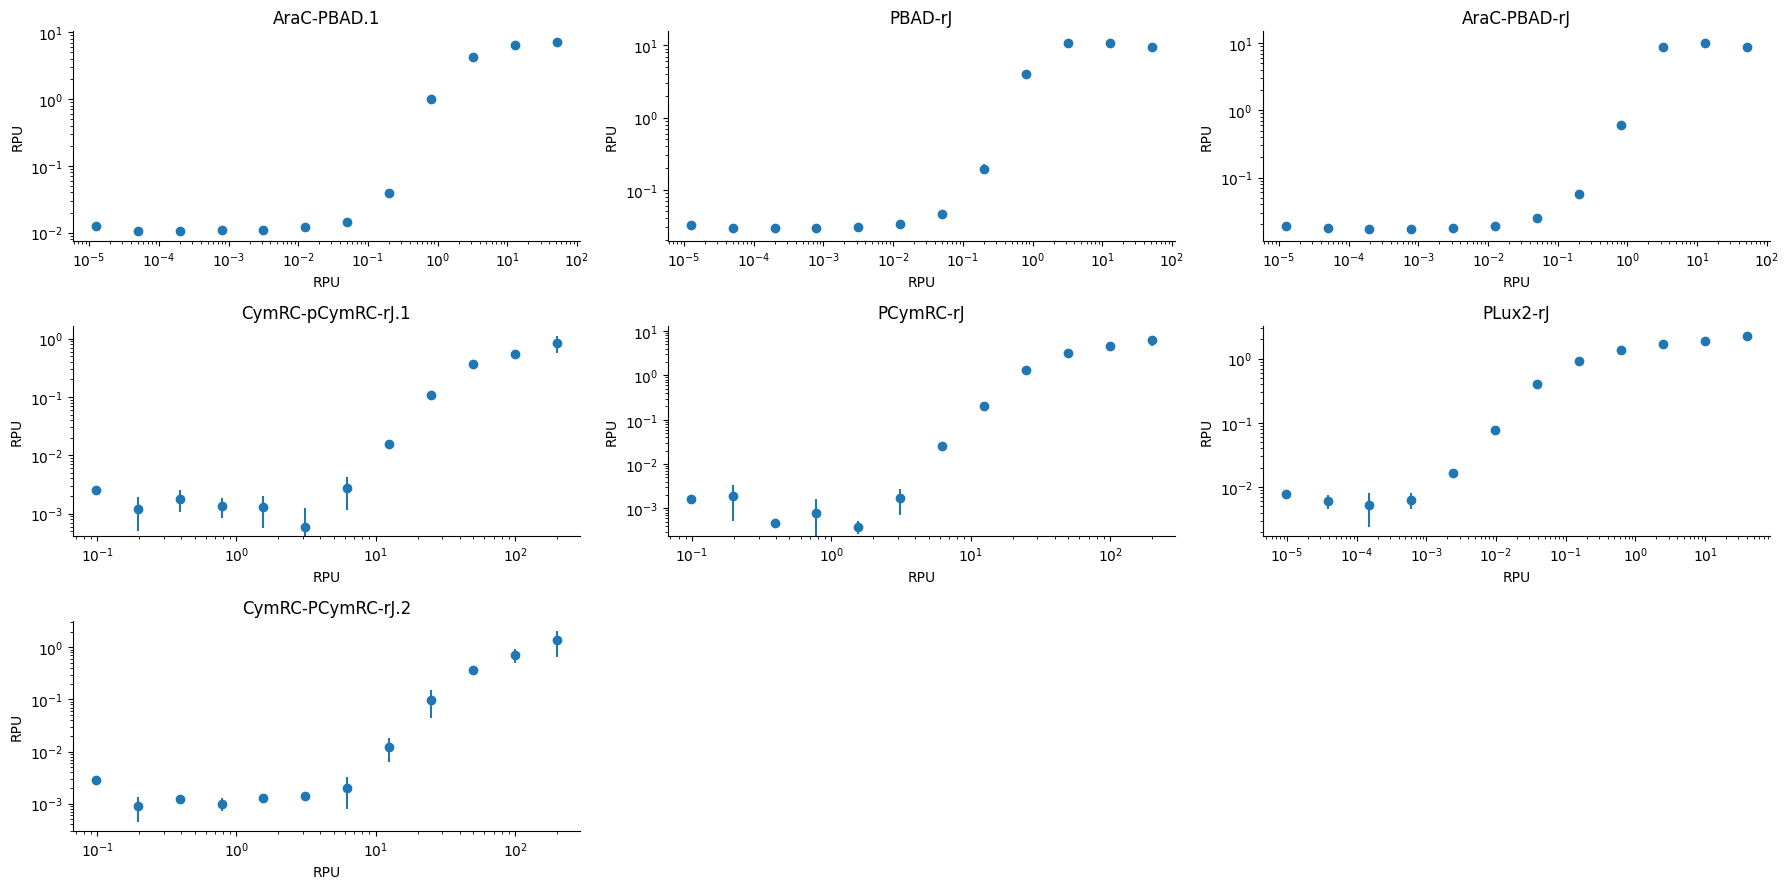

In [10]:
samples_t_30 = generate_data_at_t(folder, '030-promoters-characterization-07', map_file)[0]
samples_t_31 = generate_data_at_t(folder, '031-promoters-characterization-08', map_file)[0]
combined_samples = pd.concat([samples_t_30, samples_t_31], axis=1)
plot_multiple_responses(combined_samples, promoters, inducers)

In [11]:
map_file = '034-plate_map'

promoters = ['PLuxB-rJ', 'PPhlF-rJ', 'PSalTTC-rJ', 'RhaS-PRhaB-rJ', 'AraC-PBAD', 'CymRC-PCymRC-rJ']

induction_lvl = 11
max_inducers = [40, 50, 1600, 15300, 52, 200]
inducers = []
for x, mi in enumerate(max_inducers):
    dil = 4 if x in [0, 4] else 2
    inducer = ([mi] + [mi/i for i in [dil**j for j in range(1, induction_lvl+1)]])
    inducer.reverse()
    inducers.append(inducer)

[('A', 'sample'), ('B', 'positive')]
[('A', 'sample'), ('B', 'positive')]


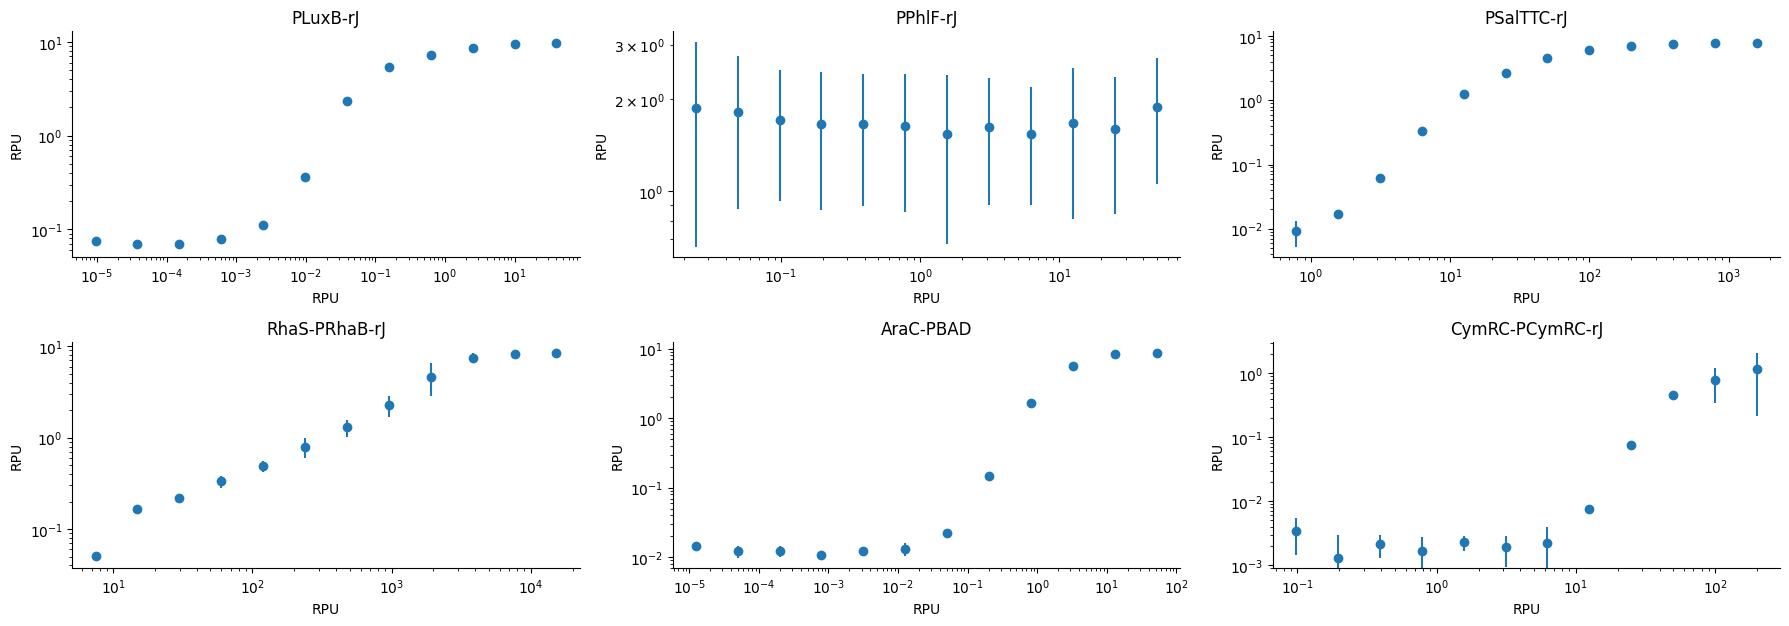

In [12]:
samples_t_34 = generate_data_at_t(folder, '034-promoters-characterization-rep1-20220313', map_file)[0]
samples_t_35 = generate_data_at_t(folder, '035-promoters-characterization-rep2-20220314', map_file)[0]
combined_samples = pd.concat([samples_t_34, samples_t_35], axis=1)
plot_multiple_responses(combined_samples, promoters, inducers)

#### PCymRC curve fitting

In [13]:
pcymrc = pd.concat([
            samples_t_29[filter(lambda x: x.startswith('CymRC-PCymRC-rJ'), samples_t_29.index)].reset_index(drop=True),
            samples_t_30[filter(lambda x: x.startswith('CymRC-PCymRC-rJ'), samples_t_30.index)].reset_index(drop=True),
            samples_t_31[filter(lambda x: x.startswith('CymRC-PCymRC-rJ'), samples_t_31.index)].reset_index(drop=True),
            samples_t_34[filter(lambda x: x.startswith('CymRC-PCymRC-rJ'), samples_t_34.index)].reset_index(drop=True),
            samples_t_35[filter(lambda x: x.startswith('CymRC-PCymRC-rJ'), samples_t_35.index)].reset_index(drop=True)
         ], axis=1)

In [14]:
y = pcymrc.mean(axis=1).values
x = inducers[-1]
#gate_bounds = [[10**0, 10**1.6, 10**0.4, 10**-3],
#               [10**0.2, 10**1.8, 10**0.6, 10**-2.8]]
gate_bounds = [[0, 1.6, 0.4, -3],
               [0.2, 1.8, 0.6, -2.8]]
init_guess = random_search(50, x, y, gate_bounds, hill_activation_single)
popt, pcov = curve_fit(hill_activation_single, x, y, p0=init_guess, bounds=gate_bounds)
#print(r2_score(y, hill_activation_single(x, *popt)))
popt

array([ 0.07024816,  1.8       ,  0.4       , -3.        ])

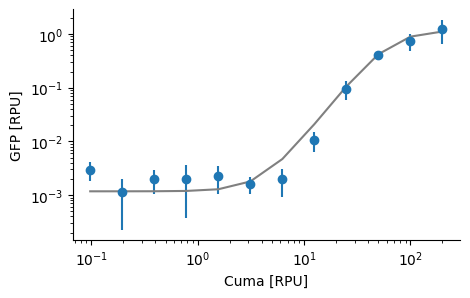

In [15]:
plt.figure(figsize=[5, 3])
plt.errorbar(inducers[-1], pcymrc.mean(axis=1), pcymrc.std(axis=1), marker='o', linestyle='')
plt.plot(inducers[-1], hill_activation_single(inducers[-1], *popt), color='gray')
plt.loglog()
#plt.xscale('log')
plt.xlabel('Cuma [RPU]')
plt.ylabel('GFP [RPU]')
sns.despine()

#### PBAD curve fitting

In [18]:
pbad = pd.concat([
            samples_t_29[filter(lambda x: x.startswith('AraC-PBAD.1'), samples_t_29.index)].reset_index(drop=True),
            samples_t_30[filter(lambda x: x.startswith('AraC-PBAD.1'), samples_t_30.index)].reset_index(drop=True),
            samples_t_31[filter(lambda x: x.startswith('AraC-PBAD.1'), samples_t_31.index)].reset_index(drop=True),
            samples_t_34[filter(lambda x: x.startswith('AraC-PBAD'), samples_t_34.index)].reset_index(drop=True),
            samples_t_35[filter(lambda x: x.startswith('AraC-PBAD'), samples_t_35.index)].reset_index(drop=True)
         ], axis=1)

In [21]:
y = pbad.mean(axis=1)
x = inducers[-2]
#init_guess = [1, 1, 1]
#gate_bounds = [[10**0, 10**1.6, 10**0.4, 10**-3],
#               [10**0.2, 10**1.8, 10**0.6, 10**-2.6]]
gate_bounds = [[0, 1.6, 0.4, -3],
               [0.2, 1.8, 0.6, -2.6]]
init_guess = random_search(50, x, y, gate_bounds, hill_activation_single)
popt, pcov = curve_fit(hill_activation_single, x, y, p0=init_guess, bounds=gate_bounds)
#print(r2_score(y, hill_activation_single(x, *popt)))
popt

array([ 0.2,  1.6,  0.6, -2.6])

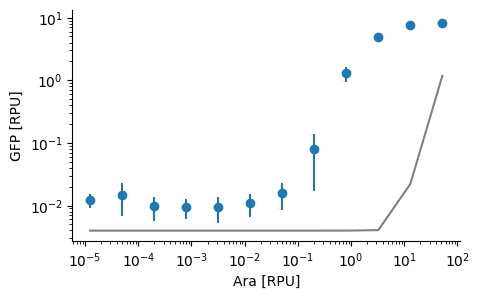

In [22]:
plt.figure(figsize=[5, 3])
plt.errorbar(inducers[-2], pbad.mean(axis=1), pbad.std(axis=1), marker='o', linestyle='')
plt.plot(inducers[-2], hill_activation_single(inducers[-2], *popt), color='gray')
plt.loglog()
plt.xlabel('Ara [RPU]')
plt.ylabel('GFP [RPU]')
sns.despine()

#### Obtaining Ara & Cuma RPU

In [29]:
hill_params = {
    'ara': [0.88, 0.3, 0.32, -2.85],
    'cuma': [0.1, 1.82, 0.49, -2.9]
}
ara = hill_activation_single(np.array([0, 0.8125, 3.25, 13, 52, 208]), *hill_params['ara'])
cuma = hill_activation_single(np.array([0, 6.25, 12.5, 25, 50, 100]), *hill_params['cuma'])
ara, cuma

(array([0.01071519, 1.01613432, 5.57718054, 7.43778024, 7.57744933,
        7.58531546]),
 array([0.00158489, 0.00244454, 0.00886886, 0.06103166, 0.3751241 ,
        0.98556622]))